In [5]:
import numpy as np
import xarray as xr
import pygmt

from pathlib import Path

In [40]:
def colourbar_scale(da):
    abs_max = np.abs(da).max()
    return int(np.around(abs_max, -3))

In [6]:
path = Path("C:\\Users\\User\\Documents\\msc-research\\data\\")
mean_fname = "mean_sam_rank_cov.nc"
var_fname = "variance_sam_rank_cov.nc"
fdr_fname = "sam_var_fdr_test.nc"

ds_mean = xr.open_dataset(path / mean_fname)
ds_var = xr.open_dataset(path / var_fname) 
ds_fdr = xr.open_dataset(path / fdr_fname) 


In [49]:
significant = ds_fdr.significant.astype('float64').to_dataframe().reset_index()
scale = colourbar_scale(ds_var['cov'])

In [53]:
sig_suppress_high_lat = significant[significant['lat'] > -70]

colorbar [ERROR]: gmtplot_latex_eps: Unable to load EPS file equation.eps
colorbar [ERROR]: gmt_map_text: Conversion of LaTeX to EPS failed


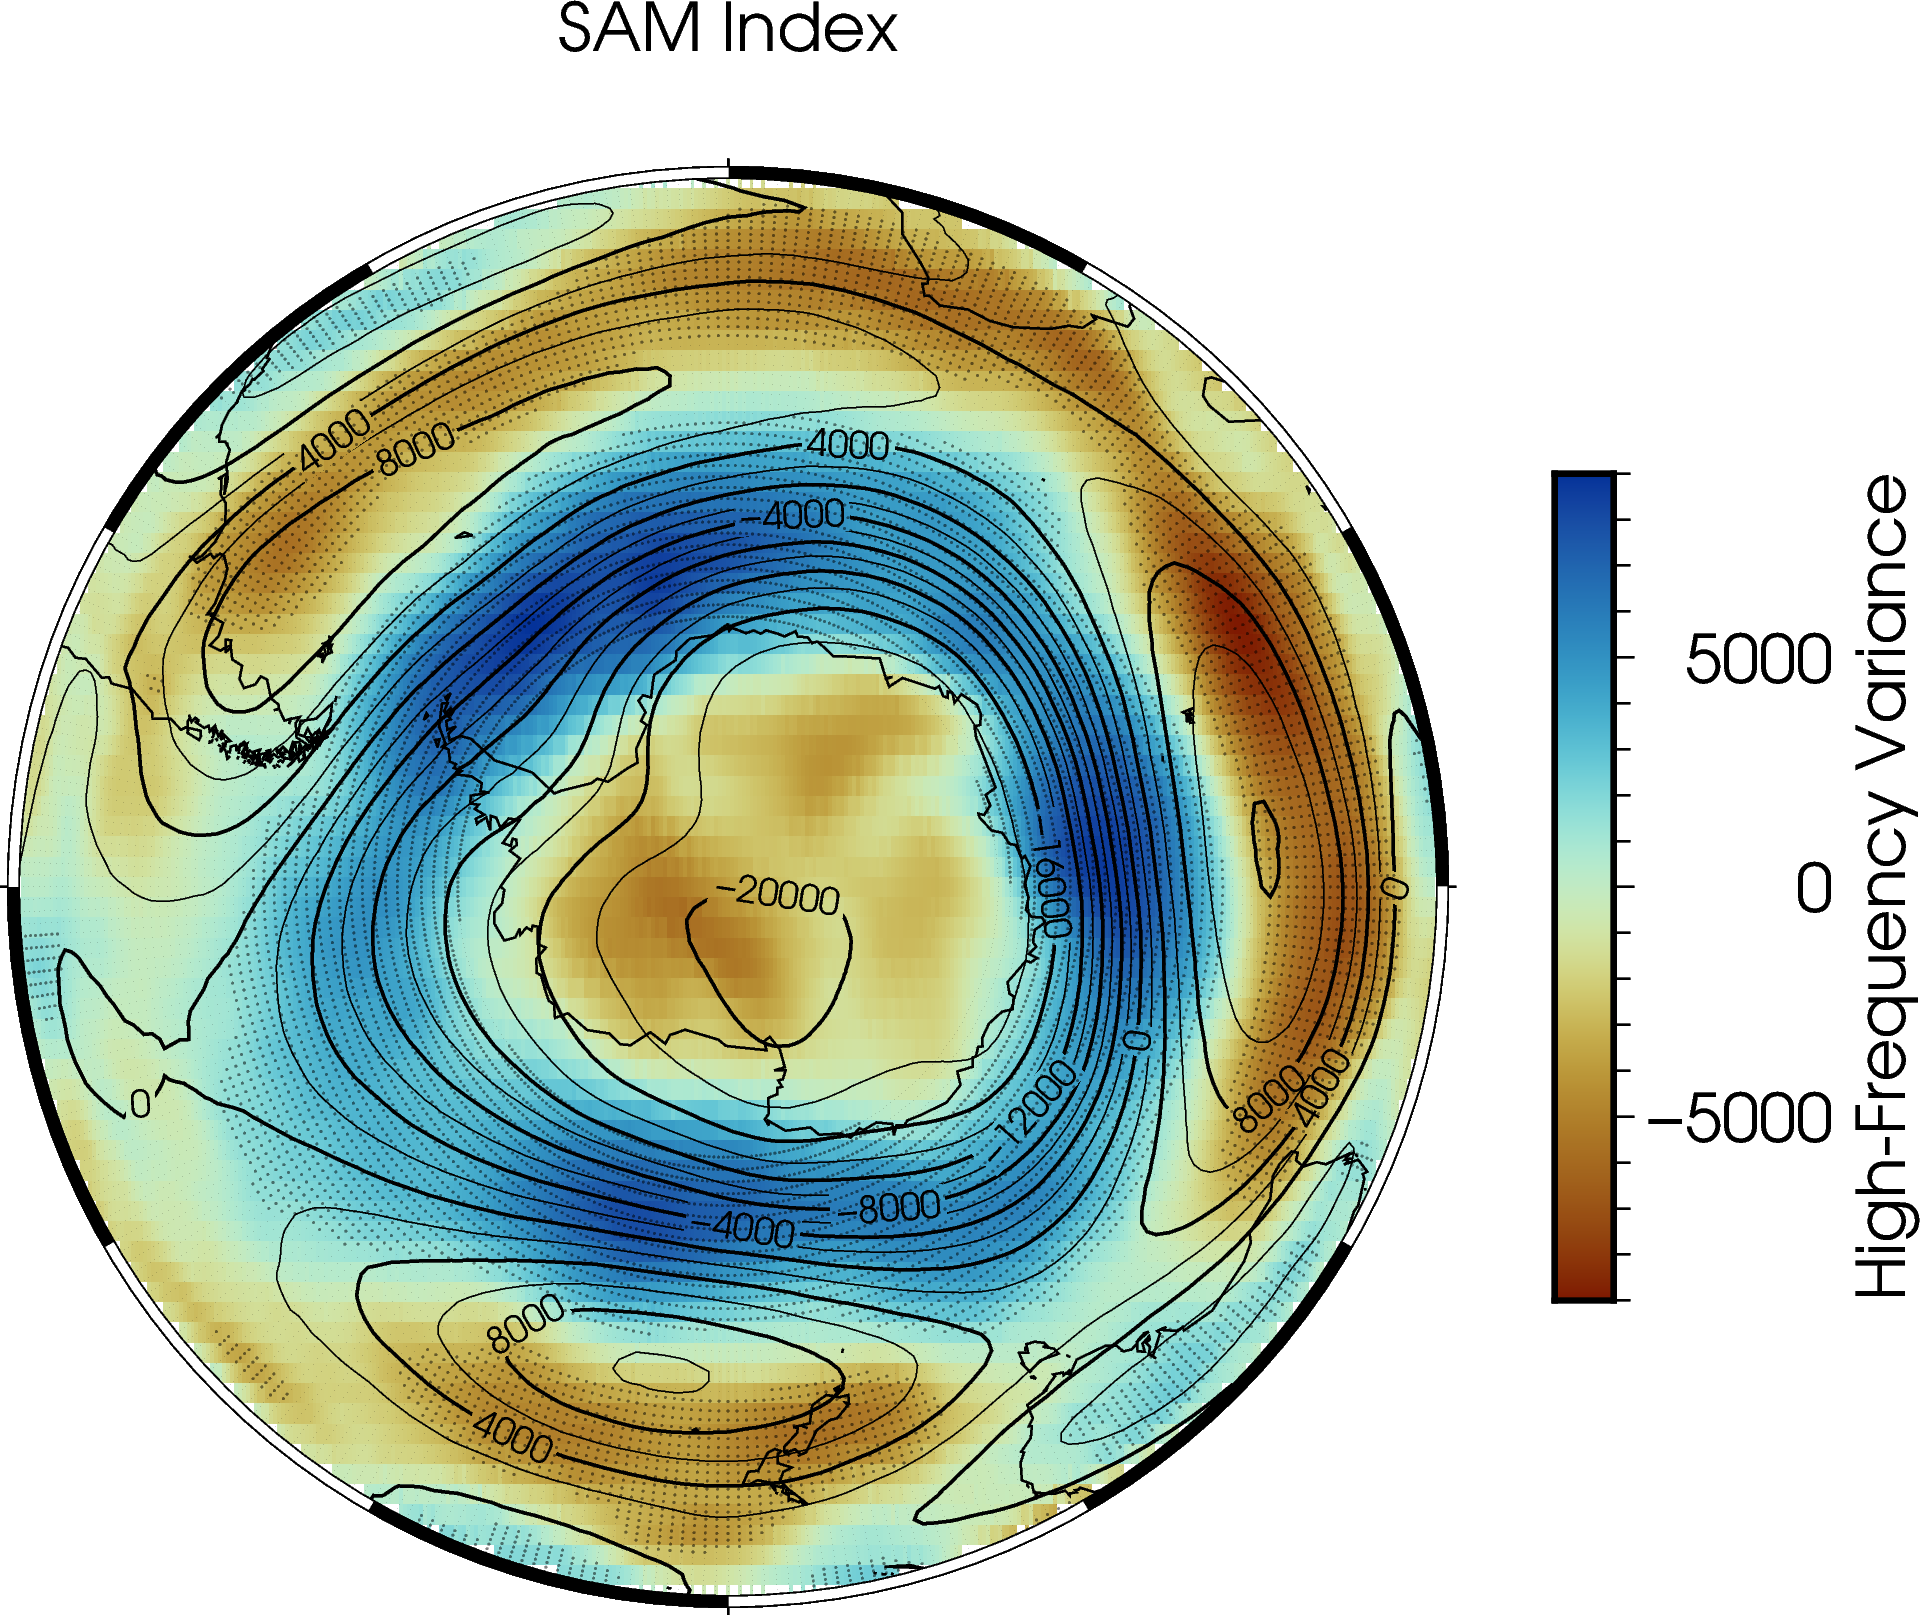

In [79]:
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="fancy+")
pygmt.config(FONT="16p,AvantGarde-Book,black")
fig.basemap(region="g", projection="G0/-90/70/12c", frame="a")

fig.grdimage(
    grid=ds_var['cov'],
    cmap="roma",
    projection="G0/-90/70/12c",
    frame=('f', '+t" SAM Index "'),
)
fig.grdcontour(
    grid=ds_mean['cov'],
)
fig.plot(
    x=sig_suppress_high_lat.lon,
    y=sig_suppress_high_lat.lat,
    size=0.02 * (sig_suppress_high_lat.significant),
    style="cc",
    color="black",
    transparency=50
)

fig.colorbar(
    cmap="roma", 
    position="JMR+o1c/0c+w7c/0.5c", 
    frame=["x+lHigh-Frequency Variance", "y+l@[m^2@["],
    scale=scale,
    )
fig.coast(shorelines="1/0.5p", resolution="c")
fig.text(text="SAMI", x=0.0, y=-10.0, font="16p,AvantGarde-Book,black")

fig.show()